<IPython.core.display.Javascript object>


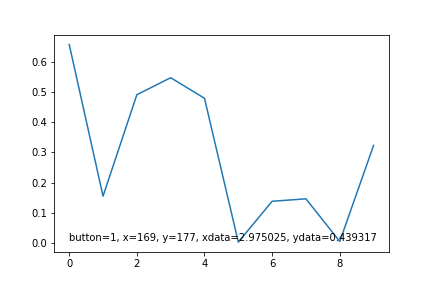

In [13]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(np.random.rand(10))
text=ax.text(0,0, "", va="bottom", ha="left")

def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

#### The code in the cell below still does not work as intended

<IPython.core.display.Javascript object>


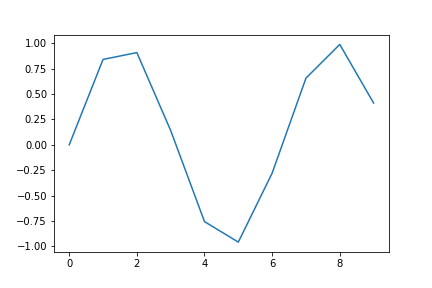

Please click
clicked []


In [16]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
t = np.arange(10)
plt.plot(t, np.sin(t))
print("Please click")
x = plt.ginput(3)
print("clicked", x)
plt.show()

<IPython.core.display.Javascript object>


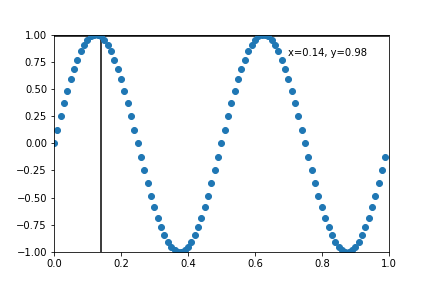

In [17]:
import matplotlib.pyplot as plt
import numpy as np


class Cursor(object):
    def __init__(self, ax):
        self.ax = ax
        self.lx = ax.axhline(color='k')  # the horiz line
        self.ly = ax.axvline(color='k')  # the vert line

        # text location in axes coords
        self.txt = ax.text(0.7, 0.9, '', transform=ax.transAxes)

    def mouse_move(self, event):
        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata
        # update the line positions
        self.lx.set_ydata(y)
        self.ly.set_xdata(x)

        self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))
        plt.draw()


class SnaptoCursor(object):
    """
    Like Cursor but the crosshair snaps to the nearest x,y point
    For simplicity, I'm assuming x is sorted
    """

    def __init__(self, ax, x, y):
        self.ax = ax
        self.lx = ax.axhline(color='k')  # the horiz line
        self.ly = ax.axvline(color='k')  # the vert line
        self.x = x
        self.y = y
        # text location in axes coords
        self.txt = ax.text(0.7, 0.9, '', transform=ax.transAxes)

    def mouse_move(self, event):

        if not event.inaxes:
            return

        x, y = event.xdata, event.ydata

        indx = min(np.searchsorted(self.x, [x])[0], len(self.x) - 1)
        x = self.x[indx]
        y = self.y[indx]
        # update the line positions
        self.lx.set_ydata(y)
        self.ly.set_xdata(x)

        self.txt.set_text('x=%1.2f, y=%1.2f' % (x, y))
        print('x=%1.2f, y=%1.2f' % (x, y))
        plt.draw()

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2 * 2 * np.pi * t)
fig, ax = plt.subplots()

# cursor = Cursor(ax)
cursor = SnaptoCursor(ax, t, s)
plt.connect('motion_notify_event', cursor.mouse_move)

ax.plot(t, s, 'o')
plt.axis([0, 1, -1, 1])
plt.show()